# Homework 2: 
## Riccardo Tancredi - riccardo.tancredi@studenti.unipd.it
---
### Plot both SAR and EAR as a function of the relative area, using the Log Series as the SAD distribution P( n ) = c (1-m)^n / n (c is the normalization constant - see Eq. 3.29). and compare it with a Power Law SAR of exponent z=0.25 (S(a)=k A^z) and k tuned so the be as close as possible to the solution for the random placement case. 

The Species Area Relationship **SAR** represents the relationship between how many species occupy a certain territory over the area of the territory itself. The Endemic Area Relationship **EAR** instead describes the number of species whose individuals are completely inside a given area $a$. The two functions are:
\begin{equation}
    \begin{cases}
        SAR(a) = S\biggl[1-\displaystyle\sum_{n=1}^\infty (1-a)^n P(n)\biggl]\\
        EAR(a) = S\displaystyle\sum_{n=1}^\infty\alpha^{n}P(n)
    \end{cases}
\end{equation} 
where $S$ is the total number of species on the whole territory, $\alpha_k = \frac{a_k}{A}$ the fraction between the $k\text{-th}$ area analyzed and the total area $A$ of the territory, $\alpha^{n_i}$ the probability that all individuals of species $i$ are inside $a$. In a *regular plot* $\alpha=\alpha_k$ $\forall k$. 
Finally, $P(n)$ represents the probability of observing a species with $n$ individuals. Using the Log Series as the SAD distribution, we get:
\begin{equation}
    P(n) = \frac{(1-\nu)^n}{n\cdot|\log(\nu)|} \quad \nu \in (0, 1)
\end{equation} 
which leads to
\begin{equation}
    \begin{cases}
        SAR(a) = S\biggl[1-\displaystyle\sum_{n=1}^\infty (1-a)^n \cdot \frac{(1-\nu)^n}{n|\log(\nu)|}\biggl]\\
        EAR(a) = S\displaystyle\sum_{n=1}^\infty\alpha^{n}\cdot \frac{(1-\nu)^n}{n|\log(\nu)|}
    \end{cases}
\end{equation} 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def SAR(alpha, S, prob, nu=0.5, N_max=1000):
    return S*(1-np.sum([(1-alpha)**n * prob(n, nu) for n in range(1, N_max)]))

def log_series(n, nu=0.5):
    return ((1-nu)**n)/(n*np.abs(np.log(nu)))

def EAR(alpha, S, prob, nu=0.5, N_max=1000):
    return S*np.sum([alpha**n * prob(n, nu) for n in range(1, N_max)])

In [3]:
S = 150
A = 3000
nu = 0.01
alphas = [i/A for i in range(1, A+1)]

specific_area_relationship = np.array([SAR(alpha, S, log_series, nu) for alpha in alphas])
endemic_area_relationship = np.array([EAR(alpha, S, log_series, nu) for alpha in alphas])

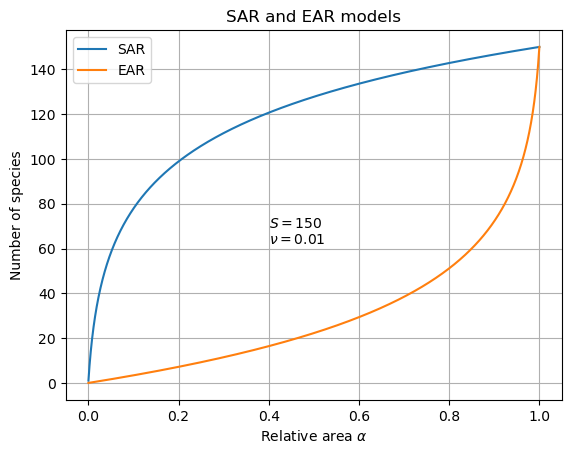

In [4]:
plt.plot(alphas, specific_area_relationship, label='SAR')
plt.plot(alphas, endemic_area_relationship, label='EAR')
# plt.yscale('log')
plt.text(0.4, 55, r'$S =$'+f'{S}\n'+r'$\nu =$'+f'{nu}\n')
plt.xlabel('Relative area '+r'$\alpha$')
plt.ylabel('Number of species')
plt.title('SAR and EAR models')
plt.legend()
plt.grid()
plt.savefig('SAR_and_EAR_models.png', dpi=300)
plt.show()

In [5]:
# comparison: S(a) = kA^z
def power_law_SAR(a, k, z=0.25):
    return k * (a**z)


In [6]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(power_law_SAR, alphas, specific_area_relationship, p0=[S])
print(f'The k estimated via the fitting is k = {popt[0]} very close to S = {S}')

The k estimated via the fitting is k = 149.75959179771 very close to S = 150


In [7]:
k = popt[0]
specific_area_relationship_power_law = np.array([power_law_SAR(alpha, k) for alpha in alphas])

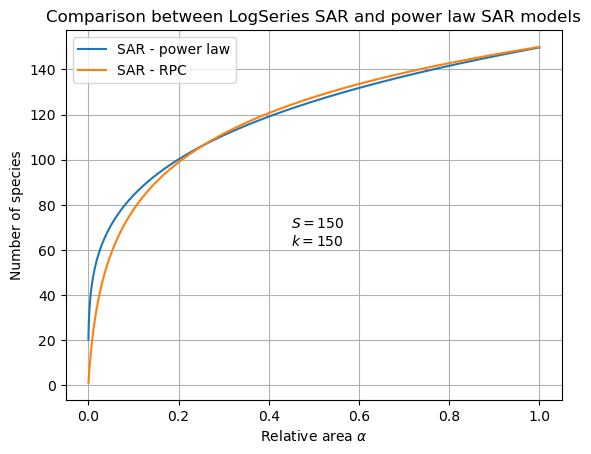

In [8]:
plt.plot(alphas, specific_area_relationship_power_law, label='SAR - power law')
plt.plot(alphas, specific_area_relationship, label='SAR - RPC')
# plt.yscale('log')
plt.text(0.45, 62, r'$S =$'+f'{S}\n'+r'$k =$'+f'{round(k)}')
plt.xlabel('Relative area '+r'$\alpha$')
plt.ylabel('Number of species')
plt.title('Comparison between LogSeries SAR and power law SAR models')
plt.legend()
plt.grid()
plt.savefig('Power_law_SAR_and_RPC.png', dpi=300)
plt.show()